### Shallow neural network

**Implement a two-layer neural network model.**

*Using generated red and blue points that form a flower, we fit a neural network to classify the colored points.*


*Pseudocode of the algorithm*:

Forward step:
$$Z^{[1]} = W^{[1]}X + b^{[1]}$$
$$A^{[1]} = \sigma(Z^{[1]})$$
$$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$$
$$A^{[2]} = \sigma(Z^{[2]})$$

Backward step:
$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]}A^{[1]T}$$
$$db^{[2]} = \frac{1}{m} \sum^{m}_{i=1}{dZ^{[2](i)}}$$
$$dZ^{[1]} = W^{[2]T}dZ^{[2]} * (1-{A^{[1]}}^2)$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]}X^{T}$$
$$db^{[1]} = \frac{1}{m} \sum^{m}_{i=1}{dZ^{[1](i)}}$$


Cost function:
$$J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}log(a^{(i)}) + (1-y^{(i)})log(1-a^{(i)}))$$
Update weights:
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$
$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def load_planar_dataset():
    """
    This function and subsequently the data used is from the Deep Learning course in Coursera.
    """
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

X, Y = load_planar_dataset()

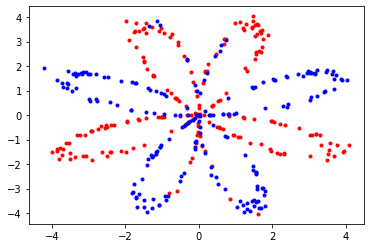

In [9]:
#Plot the training data
plt.plot(X[0,np.squeeze(Y==0)], X[1,np.squeeze(Y==0)], '.', color='red')
plt.plot(X[0,np.squeeze(Y==1)], X[1,np.squeeze(Y==1)], '.', color='blue')
plt.show()

In [10]:
def initialize_params(nx=2, nh=4, ny=1, scaling_factor=0.01):
    """
    Initialize weight and intercept parameters
    """
    params = {}
    
    params['W1'] = np.random.randn(nh,nx) * scaling_factor
    params['b1'] = np.zeros((nh,1))
    params['W2'] = np.random.randn(1,nh) * scaling_factor
    params['b2'] = np.zeros((ny,1))
    
    return params

def sigmoid(z):
    """
    Sigmoid function used in the output layer
    """
    return 1 / (1+np.exp(-z))

def forward_prop(params, X):
    """
    Forward propagation
    - Compute the output activation 
    """    
    cache = {}
    
    Z1 = np.dot(params['W1'],X) + params['b1']
    cache['A1'] = np.tanh(Z1)
    Z2 = np.dot(params['W2'],cache['A1']) + params['b2']
    cache['A2'] = sigmoid(Z2)
    
    return cache

def backward_prop(params, cache, X, Y, m):
    """
    Backward propagation
    - Compute derivatives of the cost function w.r.t model parameters 
    """
    grads = {}
    
    dZ2 = cache['A2'] - Y
    grads['dW2'] = 1/m * np.dot(dZ2,cache['A1'].T)
    grads['db2'] = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(params['W2'].T,dZ2) * (1-cache['A1']**2)
    grads['dW1'] = 1/m * np.dot(dZ1,X.T)
    grads['db1'] = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    return grads

def update_params(params, grads, alpha=0.005):
    """
    Update model parameters using gradients
    """    
    params['W1'] = params['W1'] - alpha*grads['dW1']
    params['b1'] = params['b1'] - alpha*grads['db1']
    params['W2'] = params['W2'] - alpha*grads['dW2']
    params['b2'] = params['b2'] - alpha*grads['db2']
    
    return params

def cost(cache, Y, m):
    """
    Calculate the cost function across training examples
    """
    J = -1/m * (np.dot(Y, np.log(cache['A2']).T) + np.dot(1-Y, np.log(1-cache['A2']).T))
    J = np.squeeze(J)
    return np.round(J, 3)

In [11]:
params = initialize_params()
m = X.shape[1]
n_epochs = 200000
for i in range(n_epochs):
    cache = forward_prop(params, X)
    J = cost(cache, Y, m)
    if i%10000==0:
        print('step ', i, ', cost=', J, sep='')
    grads = backward_prop(params, cache, X, Y, m)
    params = update_params(params, grads)
    
pred = forward_prop(params, X)
pred['A2'][pred['A2'] >= 0.5] = 1
pred['A2'][pred['A2'] < 0.5] = 0

print('Accuracy: ', np.sum(pred['A2']==Y) / m)

step 0, cost=0.693
step 10000, cost=0.624
step 20000, cost=0.419
step 30000, cost=0.351
step 40000, cost=0.332
step 50000, cost=0.322
step 60000, cost=0.316
step 70000, cost=0.311
step 80000, cost=0.308
step 90000, cost=0.305
step 100000, cost=0.302
step 110000, cost=0.3
step 120000, cost=0.298
step 130000, cost=0.296
step 140000, cost=0.295
step 150000, cost=0.293
step 160000, cost=0.292
step 170000, cost=0.291
step 180000, cost=0.289
step 190000, cost=0.288
Accuracy:  0.895


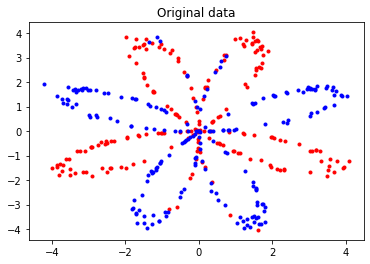

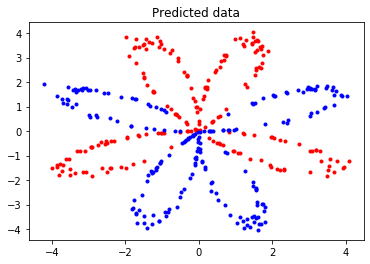

In [12]:
#Plot the original data
plt.plot(X[0,np.squeeze(Y==0)], X[1,np.squeeze(Y==0)], '.', color='red')
plt.plot(X[0,np.squeeze(Y==1)], X[1,np.squeeze(Y==1)], '.', color='blue')
plt.title('Original data')
plt.show()

#Plot the predicted data
plt.plot(X[0,np.squeeze(pred['A2']==0)], X[1,np.squeeze(pred['A2']==0)], '.', color='red')
plt.plot(X[0,np.squeeze(pred['A2']==1)], X[1,np.squeeze(pred['A2']==1)], '.', color='blue')
plt.title('Predicted data')
plt.show()